In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

cp: cannot stat 'kaggle.json': No such file or directory


In [ ]:
!kaggle datasets download -d sartajbhuvaji/brain-tumor-classification-mri

Dataset URL: https://www.kaggle.com/datasets/sartajbhuvaji/brain-tumor-classification-mri
License(s): MIT
brain-tumor-classification-mri.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
import ipywidgets as widgets # For multi classification
import io  # input output model
from PIL import Image # Public Image Library
import tqdm
from sklearn.model_selection import train_test_split
import cv2
from sklearn.utils import shuffle   # Used to shuffel the images into train_test_split
import tensorflow as tf

In [ ]:
!unzip /content/brain-tumor-classification-mri.zip

In [ ]:
import os
import numpy as np

x_train = []
y_train = []
image_size = 150  # Fixing the image size of all images
labels = ['glioma_tumor','meningioma_tumor','no_tumor','pituitary_tumor']

# From each of theese labels we have to read and append images inside x_train and y_train

for i in labels:
    folderPath = os.path.join("/content/Training",i)
    for j in os.listdir(folderPath):
        img = cv2.imread(os.path.join(folderPath,j))   # Combining folder path and j
        img = cv2.resize(img,(image_size,image_size))  # Scaling each image
        x_train.append(img)
        y_train.append(i)

x_train = np.array(x_train)
y_train = np.array(y_train)

FileNotFoundError: [Errno 2] No such file or directory: '/content/Training/glioma_tumor'

In [ ]:
# Train_Test_Split

x_train,x_test,y_train,y_test = train_test_split(x_train,y_train,test_size=0.1,random_state=101)

In [ ]:
y_train_new = []
for i in y_train:
    y_train_new.append(labels.index(i))

y_train = y_train_new
y_train = tf.keras.utils.to_categorical(y_train)

y_test_new = []
for i in y_test:
    y_test_new.append(labels.index(i))

y_test = y_test_new
y_test = tf.keras.utils.to_categorical(y_test)

In [ ]:
# CNN model

import keras
from keras.models import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,Dropout,BatchNormalization
from sklearn.metrics import accuracy_score

model = Sequential()

model.add(Conv2D(32,(3,3),activation='relu',input_shape=(150,150,3)))
model.add(Conv2D(64,(3,3),activation='relu'))

model.add(BatchNormalization())

model.add(MaxPooling2D(2,2))

model.add(Dropout(0.3))

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(Conv2D(64,(3,3),activation='relu'))

model.add(Dropout(0.3))

model.add(BatchNormalization())

model.add(MaxPooling2D(2,2))

model.add(Dropout(0.3))

model.add(Conv2D(128,(3,3),activation='relu'))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(Conv2D(128,(3,3),activation='relu'))

model.add(BatchNormalization())

model.add(MaxPooling2D(2,2))

model.add(Dropout(0.3))

model.add(Conv2D(128,(3,3),activation='relu'))
model.add(Conv2D(256,(3,3),activation='relu'))

model.add(BatchNormalization())

model.add(MaxPooling2D(2,2))

model.add(Dropout(0.3))

model.add(Flatten())

model.add(Dense(512,activation='relu'))
model.add(Dense(512,activation='relu'))

model.add(Dropout(0.3))

model.add(Dense(4,activation='softmax'))  # Four categories

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 146, 146, 64)      18496     
                                                                 
 batch_normalization (Batch  (None, 146, 146, 64)      256       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 73, 73, 64)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 73, 73, 64)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 71, 71, 64)        3

In [ ]:
model.compile(optimizer='adam',loss="categorical_crossentropy",metrics=['accuracy'])

In [ ]:
history = model.fit(x_train,y_train,epochs=13,validation_split=0.1)

Epoch 1/13
73/73 [==============================] - 9s 127ms/step - loss: 0.0791 - accuracy: 0.9755 - val_loss: 0.3379 - val_accuracy: 0.9305
Epoch 2/13
73/73 [==============================] - 9s 124ms/step - loss: 0.0899 - accuracy: 0.9707 - val_loss: 0.4960 - val_accuracy: 0.8880
Epoch 3/13
73/73 [==============================] - 9s 127ms/step - loss: 0.0681 - accuracy: 0.9798 - val_loss: 0.8337 - val_accuracy: 0.8378
Epoch 4/13
73/73 [==============================] - 9s 125ms/step - loss: 0.0686 - accuracy: 0.9772 - val_loss: 0.4889 - val_accuracy: 0.8996
Epoch 5/13
73/73 [==============================] - 9s 125ms/step - loss: 0.0641 - accuracy: 0.9772 - val_loss: 0.5455 - val_accuracy: 0.8764
Epoch 6/13
73/73 [==============================] - 9s 126ms/step - loss: 0.0499 - accuracy: 0.9871 - val_loss: 0.5861 - val_accuracy: 0.9035
Epoch 7/13
73/73 [==============================] - 9s 126ms/step - loss: 0.0537 - accuracy: 0.9845 - val_loss: 0.7385 - val_accuracy: 0.8726
Epoch 

In [ ]:
model.save('braintumer.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


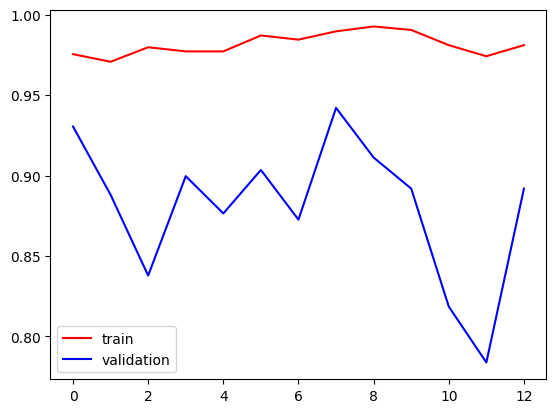

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='r',label='train')
plt.plot(history.history['val_accuracy'],color='b',label='validation')
plt.legend()
plt.show()

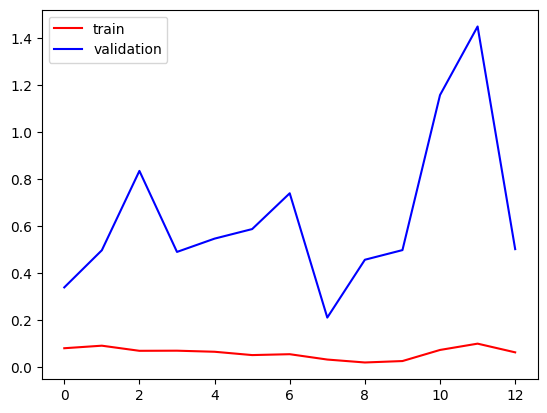

In [ ]:
plt.plot(history.history['loss'],color='r',label='train')
plt.plot(history.history['val_loss'],color='b',label='validation')
plt.legend()
plt.show()

In [ ]:
# Prediction

img = cv2.imread("/content/Testing/no_tumor/image(102).jpg")
img = cv2.resize(img,(150,150))
img_array = np.array(img)
img_array = img_array.reshape(1,150,150,3)
img_array.shape

(1, 150, 150, 3)

In [ ]:
# from tensorflow import keras
# from tensorflow.keras.preprocessing import image
# img = image.load_img('/content/Testing/meningioma_tumor/image(126).jpg')

(-0.5, 149.5, 149.5, -0.5)

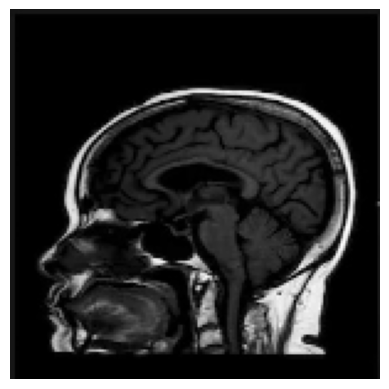

In [ ]:
plt.imshow(img)
plt.axis("off")

In [ ]:
a = model.predict(img_array) # A will be a probability array from that we have to take maximum array
i = a.argmax()
if i==0:
  print("Patient has Glioma Tumor.")
elif i==1:
  print("Patient has Meningioma Tumer.")
elif i==2:
  print("Patient has No Tumer.")
elif i==3:
  print("Patient has Pituitary Tumer.")

1/1 [==============================] - 0s 26ms/step
Patient has No Tumer.


In [ ]:
# Index 0:- glioma_tumor , 1:-meningioma_tumer , 2:-no_tumer , 3:-pituitary_tumor

In [ ]:
from sklearn.metrics import confusion_matrix

# Predict probabilities for test set
y_pred_prob = model.predict(x_test)

y_pred = np.argmax(y_pred_prob, axis=1)

y_true = np.argmax(y_test, axis=1)  # axis=1 indicates along each row

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)

TN = conf_matrix[0, 0]
FP = conf_matrix[0, 1]
FN = conf_matrix[1, 0]
TP = conf_matrix[1, 1]

print("True Positives:", TP)
print("True Negatives:", TN)
print("False Positives:", FP)
print("False Negatives:", FN)

9/9 [==============================] - 1s 182ms/step
True Positives: 75
True Negatives: 95
False Positives: 2
False Negatives: 5


In [ ]:
accuracy = (TP + TN) / (TP + TN + FP + FN)
print("Accuracy:", accuracy)

Accuracy: 0.96045197740113
